<br>

# Titanic Survivor Predictor 

-----------

    This project tackles the Titanic Survival prediction competition on Kaggle. This project was guided using DataQuest's 'Creating a Kaggle Workflow' module: 
    
    https://www.dataquest.io/m/188-guided-project-creating-a-kaggle-workflow/

### Imports

In [541]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from scipy.stats import mode

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

## Data Exploration

------

In [542]:
train = pd.read_csv('./train.csv')
test  = pd.read_csv('./test.csv')

In [591]:
train_original = train

In [543]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [544]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [545]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [546]:
train_numeric = train.select_dtypes(exclude = object)

In [547]:
train_numeric.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500

In [548]:
train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


### Distributions

**Cabin**

In [549]:
train['Cabin'].str[0].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

**Names/Titles**

In [550]:
#extracting the title from the name gives more info than the name itself
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.')
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Jonkheer      1
Lady          1
Mme           1
Capt          1
Sir           1
Don           1
Countess      1
Ms            1
Name: Title, dtype: int64

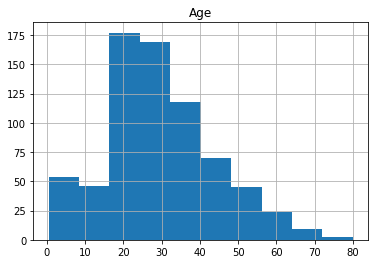

In [551]:
train['Age'].hist()
title = plt.title("Age") #suppress output

512.3292

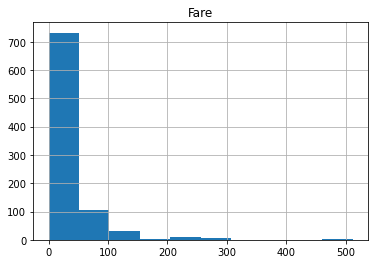

In [552]:
train['Fare'].hist()
title = plt.title("Fare") #suppress output
train['Fare'].max()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

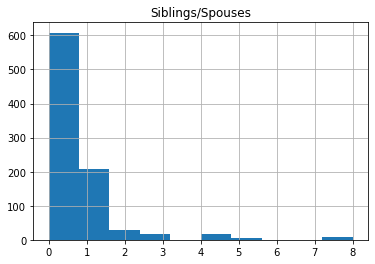

In [553]:
train['SibSp'].hist()
title = plt.title("Siblings/Spouses") #suppress output
train['SibSp'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

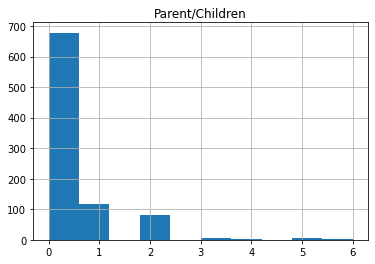

In [554]:
train['Parch'].hist()
title = plt.title("Parent/Children") #suppress output
train['Parch'].value_counts()

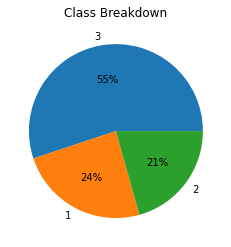

In [555]:
plt.pie(train['Pclass'].value_counts(), labels = ['3', '1', '2'], autopct='%1.f%%')
_ = plt.title("Class Breakdown")

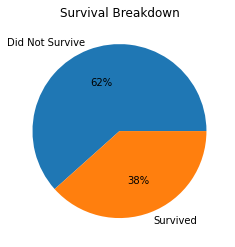

In [556]:
plt.pie(train['Survived'].value_counts(), labels = ['Did Not Survive', 'Survived'], autopct='%1.f%%')
_ = plt.title("Survival Breakdown")

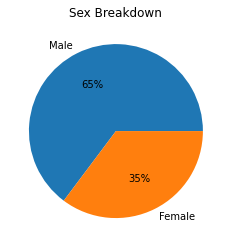

In [557]:
plt.pie(train['Sex'].value_counts(), labels = ['Male', 'Female'], autopct='%1.f%%')
_ = plt.title("Sex Breakdown")

### Pivot Tables: Who Survived?

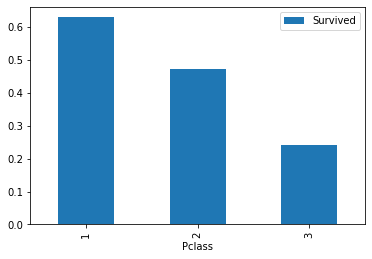

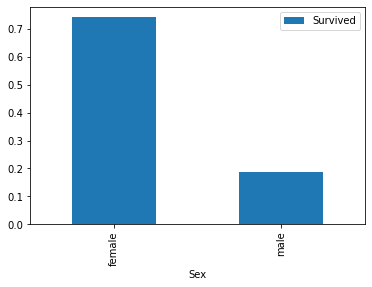

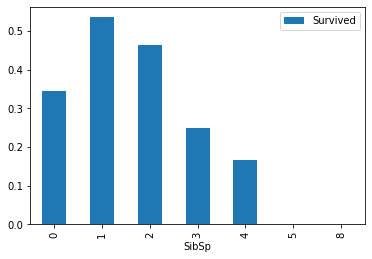

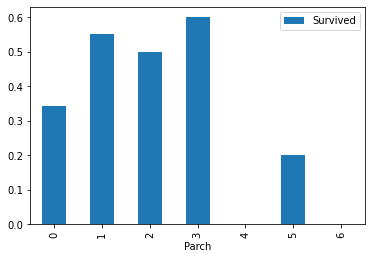

In [558]:
explore_cols = ['Pclass', 'Sex', 'SibSp', 'Parch']
for col in explore_cols:
    pivot = train.pivot_table(index = col, values = 'Survived')
    pivot.plot.bar()

Looking at the Pclass pivot table shows expected results: higher class tends to lead to better chance of survival. 

As for sex, this just comes from the Titanic film, but assuming the 'Women and Children First' motto holds for the reality of life boat usage during the Titanic sinking, the results are to be expected: women were almost 3 times more likely to survive, despite making up 1/3 of the total passengers. 

However, the SibSp and Parch columns are a bit amniguous. Its hard to know what the value refers to exactly (ie a value of 1 for Parch. Is this 1 parent? 1 Child?) What might be more informative is looking at the size of the passengers' families as a whole.

**Combining Parch and SibSp to analyze the effect of family size on survival**

In [559]:
train['family_size'] = train[['SibSp', 'Parch']].sum(axis = 1)

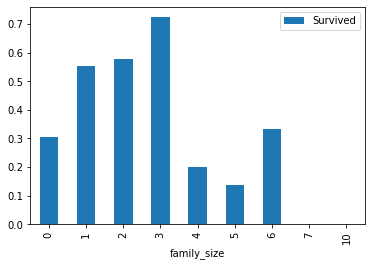

In [560]:
pivot = train.pivot_table(index = 'family_size', values = 'Survived')
pivot.plot.bar()  

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: family_size, dtype: int64

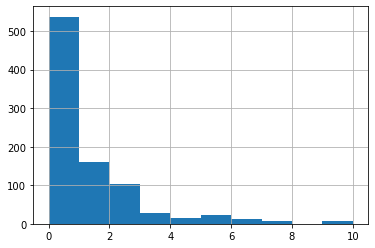

In [561]:
train['family_size'].hist()
train['family_size'].value_counts()

Looking at the pivot table and the distribution for the Family Size column, we can see that people with small families (1 to 3 people) onboard tended to have better chances of survival. We can see from the distribution that the majority of passengers onboard, however, were travelling alone.

## Data Wrangling

-------

**I'll first impute missing values and drop specific columns**

In [562]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
 13  family_size  891 non-null    int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 97.6+ KB


In [563]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [564]:
#impute missing ages with mode
mode_age = mode(train['Age'].values)[0][0]
train['Age'].fillna(mode_age, inplace = True)

#impute missing embarked values with mode 'S'
train['Embarked'].fillna('S', inplace = True)

#Cabin is missing about 75% of the data, so I'll drop this col for now
train.drop('Cabin', axis = 1, inplace = True)

**Now on to data preprocessing**

In [565]:
train['Age'].value_counts(bins = 6)

(13.683, 26.947]    425
(26.947, 40.21]     245
(40.21, 53.473]     100
(0.339, 13.683]      71
(53.473, 66.737]     43
(66.737, 80.0]        7
Name: Age, dtype: int64

In [566]:
def bin_ages(df):
    '''
    This function takes advantage of the ordinal and categorical nature of age
    and creates bins for all the passengers ages
    '''

    bin_cutoffs = [0, 5, 12, 18, 25, 60, 81]
    labels = ['Infant', 'Child', 'Teen', 'Young Adult', 'Adult', 'Elderly']
    df['Age_Bin'] = pd.cut(df['Age'], bin_cutoffs, labels = labels)
    return df

In [567]:
train['Fare'].value_counts(bins = [0, 10, 20, 30, 50, 100, 1000] )

(-0.001, 10.0]     336
(10.0, 20.0]       179
(20.0, 30.0]       142
(50.0, 100.0]      107
(30.0, 50.0]        74
(100.0, 1000.0]     53
Name: Fare, dtype: int64

In [568]:
train['Fare'].max()

512.3292

In [569]:
def bin_fares(df):
    
    bin_cutoffs = [-1, 10, 20, 30, 50, 100, 513]
    labels = ['0-10', '10-20', '20-30', '30-50', '50-100', '100+']
    df['Fare_Bin'] = pd.cut(df['Fare'], bin_cutoffs, labels = labels)
    return df

In [570]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Jonkheer      1
Lady          1
Mme           1
Capt          1
Sir           1
Don           1
Countess      1
Ms            1
Name: Title, dtype: int64

In [571]:
def map_titles(df):
    '''
    This function uses the titles that were extracted from the 'Name' column in 
    the Data Exploration step, and takes care of binning and 'overlapping' titles 
    (ie 'ms' and 'miss')   
    '''
    
    title_map = {
        "Mr"      : "Mr",
        "Miss"    : "Ms",
        "Mlle"    : "Ms",
        "Ms"      : "Ms",
        "Mrs"     : "Mrs",
        "Mme"     : "Mrs",
        "Master"  : "Master",
        "Dr"      : "Officer",
        "Rev"     : "Officer",
        "Col"     : "Officer",
        "Capt"    : "Officer",
        "Major"   : "Officer",
        "Jonkheer": "Royalty",
        "Lady"    : "Royalty",
        "Sir"     : "Royalty",
        "Don"     : "Royalty",
        "Countess": "Royalty",      
    }
    df['Title'] = df['Title'].map(title_map)
    return df

In [572]:
def create_dummy_cols(df, columns):
    '''
    Creates dummy columns for categorical cols
    
    args:
        df -- the DataFrame to be transformed
        columns -- a list of columns in the df to be transformed
    
    returns:
        df -- the transformed DataFrame
    '''

    for col in columns:
        dummies = pd.get_dummies(df[col], prefix = col)
        df = pd.concat([df, dummies], axis = 1)
    
    return df

In [573]:
train.head(1)

PassengerId  Survived  Pclass                     Name   Sex   Age  SibSp  \
0            1         0       3  Braund, Mr. Owen Harris  male  22.0      1   

   Parch     Ticket  Fare Embarked Title  family_size  
0      0  A/5 21171  7.25        S    Mr            1

**Pipeline the training dataframe**

In [578]:
features = bin_ages(train)
features = bin_fares(features)
features = map_titles(features)
features = create_dummy_cols(features, ['Sex', 'Embarked', 'Title', 'Age_Bin', 'Fare_Bin'])

#drop unnecessary columns
cols = ['PassengerId', 'Name', 'Ticket', 'Sex', 
     'Embarked', 'Title', 'Age_Bin', 'Fare_Bin']
features.drop(cols, axis = 1, inplace = True)

In [579]:
features.head(1)

Survived  Pclass   Age  SibSp  Parch  Fare  family_size  Sex_female  \
0         0       3  22.0      1      0  7.25            1           0   

   Sex_male  Embarked_C  ...  Age_Bin_Teen  Age_Bin_Young Adult  \
0         1           0  ...             0                    1   

   Age_Bin_Adult  Age_Bin_Elderly  Fare_Bin_0-10  Fare_Bin_10-20  \
0              0                0              1               0   

   Fare_Bin_20-30  Fare_Bin_30-50  Fare_Bin_50-100  Fare_Bin_100+  
0               0               0                0              0  

[1 rows x 30 columns]

In [581]:
features.shape

(891, 30)

## Feature Selection
----

In [577]:
def select_best_features(df):
    '''
    Select all of the best performing numeric cols
    '''
    
    #select only numeric columns
    df_num = df.select_dtypes(exclude = object).dropna(axis = 1)
    
    #drop target col 
    target = df_num['Survived']
    df_num.drop('Survived', axis = 1, inplace = True)
    
    #get best features    
    rfc = RandomForestClassifier(random_state = 1)
    selector = RFECV(rfc, cv = 10)
    selector.fit(df_num, target)
    
    best_features = df_num.columns[selector.support_].tolist()
    
    return best_features      
    
    

In [585]:
#train_best = select_best_features(train.select_dtypes(exclude = object))
features_best = select_best_features(features)

In [597]:
features.head(1)

Survived  Pclass   Age  SibSp  Parch  Fare  family_size  Sex_female  \
0         0       3  22.0      1      0  7.25            1           0   

   Sex_male  Embarked_C  ...  Age_Bin_Teen  Age_Bin_Young Adult  \
0         1           0  ...             0                    1   

   Age_Bin_Adult  Age_Bin_Elderly  Fare_Bin_0-10  Fare_Bin_10-20  \
0              0                0              1               0   

   Fare_Bin_20-30  Fare_Bin_30-50  Fare_Bin_50-100  Fare_Bin_100+  
0               0               0                0              0  

[1 rows x 30 columns]

In [601]:
dummy_features_only = features.drop(['Age', 'SibSp', 'Parch', 'Fare'], axis = 1)

In [587]:
features_best

['Pclass', 'Age', 'Fare', 'family_size', 'Sex_female', 'Title_Mr']

## Model Selection and Hyperparameter Tuning
-----

In [619]:
def select_model(df, features):
    
    X = df[features]
    Y = df['Survived']
    
    #a list of dict's for models with names, estimators, dict of hyperparams
    
    models = [
        {
            'name': 'LogisticRegression',
            'estimator': LogisticRegression(),
            'hyperparams':
                {
                    'solver': ['newton-cg', 'lbfgs', 'liblinear']
                }
        },
        
        {
            'name' : 'KNeighborsClassifier',
            'estimator' : KNeighborsClassifier(),
            'hyperparams':
                {
                    'n_neighbors' : range(1, 30, 3),
                    'weights' : ['distance', 'uniform'],
                    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                    'p': [1, 2]
                }
            
        },
        
        {
            'name' : 'RandomForestClassifier',
            'estimator' : RandomForestClassifier(),
            'hyperparams' :
                {
                    'n_estimators': [5, 10, 15],
                    'criterion' : ['entropy', 'gini'],
                    'max_depth' : [2, 5, 10],
                    'max_features': ['log2', 'sqrt'],
                    'min_samples_split' : [2, 4, 6]
                }
        }
    ]
    
    for model in models:
        print('\n')
        print(model['name'])
        print('-'*len(model['name']))
        
        grid = GridSearchCV(model['estimator'],
                            param_grid = model['hyperparams'],
                            cv = 10)
        
        grid.fit(X, Y)
        model['best_params'] = grid.best_params_
        model['best_score'] = grid.best_score_
        model['best_model'] = grid.best_estimator_
        
        print('Best Score: {}'.format(model['best_score']))
        print('Best Params: {}'.format(model['best_params']))
    
    return models
       
        

In [617]:
#baseline testing
baseline_features = train_original.drop('Survived', axis = 1).select_dtypes(exclude = object).columns.tolist()
models_baseline = select_model(train_original.dropna(axis = 1), baseline_features)

LogisticRegression
------------------


C:\Users\Yousef\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Yousef\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

Best Score: 0.6892009987515606
Best Params: {'solver': 'liblinear'}
KNeighborsClassifier
--------------------
Best Score: 0.6465043695380774
Best Params: {'algorithm': 'ball_tree', 'n_neighbors': 28, 'p': 2, 'weights': 'uniform'}
RandomForestClassifier
----------------------
Best Score: 0.7172534332084893
Best Params: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2', 'min_samples_split': 6, 'n_estimators': 5}


In [620]:
#model testing (using all features, dummy and original (numeric))
feature_cols = features.drop('Survived', axis = 1).columns.tolist()
model_features_all = select_model(features, feature_cols)



LogisticRegression
------------------


C:\Users\Yousef\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Yousef\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

Best Score: 0.8159675405742821
Best Params: {'solver': 'newton-cg'}


KNeighborsClassifier
--------------------
Best Score: 0.776729088639201
Best Params: {'algorithm': 'ball_tree', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


RandomForestClassifier
----------------------
Best Score: 0.8395380774032459
Best Params: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 6, 'n_estimators': 10}


In [621]:
#model testing (using only dummy features)
feature_cols = dummy_features_only.drop('Survived', axis = 1).columns.tolist()
model_features_all = select_model(dummy_features_only, feature_cols)



LogisticRegression
------------------
Best Score: 0.8193508114856429
Best Params: {'solver': 'liblinear'}


KNeighborsClassifier
--------------------
Best Score: 0.8316479400749064
Best Params: {'algorithm': 'ball_tree', 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}


RandomForestClassifier
----------------------
Best Score: 0.8395630461922596
Best Params: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 10}


In [622]:
#model testing (using best selected features)
model_features_all = select_model(features, features_best)



LogisticRegression
------------------
Best Score: 0.8103245942571785
Best Params: {'solver': 'newton-cg'}


KNeighborsClassifier
--------------------
Best Score: 0.768876404494382
Best Params: {'algorithm': 'ball_tree', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}


RandomForestClassifier
----------------------
Best Score: 0.8474157303370786
Best Params: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 6, 'n_estimators': 15}


# Conclusion

From the model selection algorithm above, we can see that the **Random Forest Classifier performs best** at the task of predicting Titanic survival with an **accuracy of 0.847**. This is great when compared to the baseline Random Forest model at 0.717. This model can even be tuned further for better results. 

We were also able to find that the best features at predicting survival were:

In [623]:
features_best

['Pclass', 'Age', 'Fare', 'family_size', 'Sex_female', 'Title_Mr']

Most of these features make sense when we compare them to the pivot tables produced in the data analysis portion of this project